<a href="https://colab.research.google.com/github/TKph/colab/blob/main/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95%E3%81%AB%E3%82%88%E3%82%8B%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
#単回帰

---




In [ ]:
!pip install mglearn



from sklearn.model_selection import train_test_split  #訓練データとテストデータに分割するメソッド
from mglearn.datasets import load_extended_boston #今回使うデータ

X,y = load_extended_boston()  #Xは行列だから大文字?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
#75%をtrain, 25%をtestに分割. test_size引数を設定することで変更可能
#random_state = 0をすることによって乱数を固定できる. 再現性を意識しろ

In [ ]:
from matplotlib.axis import XTick
import matplotlib.pyplot as plt
from sklearn import linear_model
plt.style.use('seaborn-darkgrid')

X_train_single = X_train[:,5].reshape(-1,1) #mglearnの中には13種類の特徴量があるが, 今回は配列[5]の平均部屋数を使う
#スライスみたいなのなに？
X_test_single = X_test[:,5].reshape(-1,1)

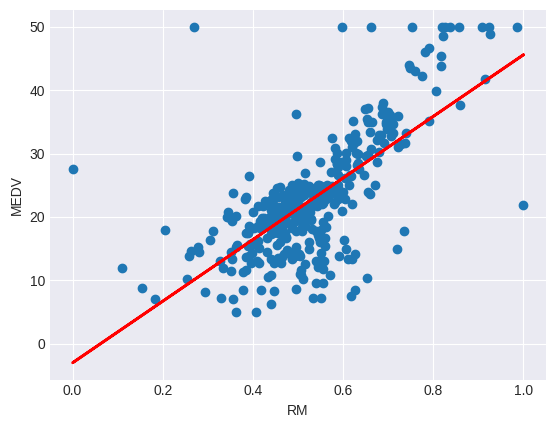

In [4]:
lm_single = linear_model.LinearRegression() #linear_modelがモジュール, LinearRegressionはクラス
lm_single.fit(X_train_single, y_train)  #これでモデル適用(fit), 最小二乗法

y_pred_train = lm_single.predict(X_train_single)  #単回帰モデルで訓練データを予測

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.scatter(X_train_single, y_train)  #データ点を散布図を作成
plt.plot(X_train_single, y_pred_train, color='red', linewidth=2)  #回帰直線を作成
plt.show()

In [5]:
#単回帰なので y = w0 + w1*x (yが価格でxが部屋数, ベクトルwを学習させた)
print(f'intercept: {lm_single.intercept_:.2f}') #切片w0
print(f'coef: {lm_single.coef_[0]:.2f}')  #傾きw1

intercept: -3.02
coef: 48.60


In [6]:
print(f'Train score: {lm_single.score(X_train_single, y_train):.2f}') #訓練データの評価
print(f'Test score:{lm_single.score(X_test_single, y_test):.2f}') #テストデータの評価

#線形回帰モデルの評価はR²スコアが用いられる
#R²=1 - (Y-y')/(y-u)  分子は誤差の二乗和, 分母は偏差の二乗和

Train score: 0.49
Test score:0.47




---
# 重回帰




---



In [8]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)  #特徴量が13個->重回帰, 最小二乗法

print(f'intercept: {lm.intercept_:.2f}')
print(f'coef: {lm.coef_[:4]}')

print(f'Train score: {lm.score(X_train, y_train):.2f}')
print(f'Test score:{lm.score(X_test, y_test):.2f}')

# y = w0 + w1*x1 + w2*x2 + ... + wn*xn

intercept: 30.93
coef: [-412.7109467   -52.24320682 -131.89881469  -12.00413648]
Train score: 0.95
Test score:0.61
